# K-Nearest-Neighbors (KNN)

👇 Load the dataset `university_admissions.csv` from the `data` folder into a dataframe. Display the 5 first rows.

In [10]:
import pandas as pd
uni_df = pd.read_csv('data/university_admissions.csv')
uni_df.head()

,rating,CGPA,admitted
0,4,9.88,True
1,4,8.30,True
2,3,6.59,False
3,4,8.96,True
4,1,5.74,True


The task is to predict if a student will be admitted considering his CGPA and the rating of the university he is applying to.

##  1. Holdout

👇 Split the data into train and test sets. Take 30% of the dataset for the test set and specify `random_state = 1` for the split.

[Sklearn `train_test_split` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
from sklearn.model_selection import train_test_split
features = ['rating', 'CGPA']
# Ready X and y
X = uni_df[features]
y = uni_df['admitted']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)


## 2. Modelling

👇 Train and score a 10-Nearest-Neighbors Classifier.

[Sklearn `KneighborsClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
)

In [33]:
# Import model
from sklearn.neighbors import KNeighborsClassifier 
# Instanciate the model
Kmodel = KNeighborsClassifier(10)
# Train the model on the Training data
Kmodel.fit(X_train, y_train)
# Score the model on the Testing data
Kmodel.score(X_test, y_test)

0.8939393939393939

The KNN model should outperform the Logistic Regression model as it is able to capture non-linear patterns. 

<details>
    <summary>
        👉Answer
    </summary>
    The model accuracy should reach 89%.
</details>

## 3. Optimizing $k$

👇 Loop over different values of $k$ and record the model's score for each value.

In [68]:
results = pd.DataFrame(columns=['k','Kmodel_test_results', 'Kmodel_train_results'])
for n in range(20):
    Kmodel_loop = KNeighborsClassifier(n +1)
    Kmodel_loop.fit(X_train, y_train)
    results = results.append({\
                              'k':n+1, 'Kmodel_test_results' : Kmodel_loop.score(X_test, y_test),\
                              'Kmodel_train_results':Kmodel_loop.score(X_train, y_train)}, ignore_index=True)
results.loc[:,'perf'] = results['Kmodel_train_results'] - results['Kmodel_test_results']
display(results['perf'].idxmin(), results['k'][12])
results

12

13.0

,k,Kmodel_test_results,Kmodel_train_results,perf
0,1.0,0.876623,0.950835,0.074212
1,2.0,0.833333,0.926716,0.093383
2,3.0,0.887446,0.931354,0.043908
3,4.0,0.874459,0.926716,0.052257
4,5.0,0.902597,0.920223,0.017625
5,6.0,0.883117,0.918367,0.035250
6,7.0,0.900433,0.920223,0.019790
7,8.0,0.889610,0.912801,0.023191
8,9.0,0.902597,0.918367,0.015770
9,10.0,0.893939,0.916512,0.022573


In [69]:
results['Kmodel_test_results'].argmax()

4

👇 Plot scores over $k$

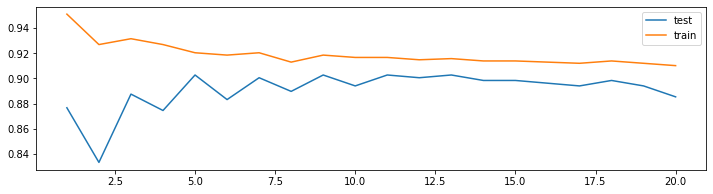

In [62]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1,1, figsize = (12,3))
ax1.plot(results['k'], results['Kmodel_test_results'], label = 'test')
ax1.plot(results['k'], results['Kmodel_train_results'], label = 'train')
plt.legend()

❓ Which value of $k$ performs best?

 k = 5 or 10

❓ What is the best score?

close to 0.91

<details>
    <summary>
        👉Answer
    </summary>
    The best accuracy should reach almost 91%.
</details>

❓ If your **`CGPA` is 7.8**, will you be accepted in an university with a **`rating` of 3**?

In [64]:
Kmodel = KNeighborsClassifier(5)
# Train the model on the Training data
Kmodel.fit(X_train, y_train)
# Score the model on the Testing data
Kmodel.score(X_test, y_test)

0.9025974025974026

In [65]:
Kmodel.predict_proba([[3,7.8]])

array([[0.2, 0.8]])

⚠️ Please, push the exercice once you have completed it 🙃

# 🏁